In [1]:
!pip install wget

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9675 sha256=1d813e09d82e94fbc13ded2e1ea45843f71f5334faa16a6e0f926c474c4da4c5
  Stored in directory: /root/.cache/pip/wheels/a1/b6/7c/0e63e34eb06634181c63adacca38b79ff8f35c37e3c13e3c02
Successfully built wget


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import wget
pd.options.display.float_format = '{:,.4f}'.format

In [3]:
wget.download('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AER_credit_card_data.csv')

'AER_credit_card_data.csv'

In [10]:
df = pd.read_csv('AER_credit_card_data.csv')
df

,card,reports,age,income,share,expenditure,owner,selfemp,dependents,months,majorcards,active
0,yes,0,37.6667,4.5200,0.0333,124.9833,yes,no,3,54,1,12
1,yes,0,33.2500,2.4200,0.0052,9.8542,no,no,3,34,1,13
2,yes,0,33.6667,4.5000,0.0042,15.0000,yes,no,4,58,1,5
3,yes,0,30.5000,2.5400,0.0652,137.8692,no,no,0,25,1,7
4,yes,0,32.1667,9.7867,0.0671,546.5033,yes,no,2,64,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1314,yes,0,33.5833,4.5660,0.0021,7.3333,yes,no,0,94,1,19
1315,no,5,23.9167,3.1920,0.0004,0.0000,no,no,3,12,1,5
1316,yes,0,40.5833,4.6000,0.0265,101.2983,yes,no,2,1,1,2
1317,yes,0,32.8333,3.7000,0.0090,26.9967,no,yes,0,60,1,7


The goal of this homework is to inspect the output of different evaluation metrics by creating a classification model (target column card).

## Preparation:
Create the target variable by mapping yes to 1 and no to 0.
Split the dataset into 3 parts: train/validation/test with 60%/20%/20% distribution. Use train_test_split funciton for that with random_state=1.

In [11]:
target_dict = {'yes':1, 'no':0}
df['card'] = df['card'].map(target_dict)
df['card']

0       1
1       1
2       1
3       1
4       1
       ..
1314    1
1315    0
1316    1
1317    1
1318    1
Name: card, Length: 1319, dtype: int64

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1319 entries, 0 to 1318
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   card         1319 non-null   int64  
 1   reports      1319 non-null   int64  
 2   age          1319 non-null   float64
 3   income       1319 non-null   float64
 4   share        1319 non-null   float64
 5   expenditure  1319 non-null   float64
 6   owner        1319 non-null   object 
 7   selfemp      1319 non-null   object 
 8   dependents   1319 non-null   int64  
 9   months       1319 non-null   int64  
 10  majorcards   1319 non-null   int64  
 11  active       1319 non-null   int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 123.8+ KB


In [12]:
# splitting data:
from sklearn.model_selection import train_test_split
df_train_full, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=1)

y_train = df_train['card']
y_test = df_test['card']
y_val = df_val['card']

df_train = df_train[[x for x in list(df.columns) if x not in ['card']]]
df_test = df_test[[x for x in list(df.columns) if x not in ['card']]]
df_val = df_val[[x for x in list(df.columns) if x not in ['card']]]

## Question 1:

ROC AUC could also be used to evaluate feature importance of numerical variables.

Let's do that

For each numerical variable, use it as score and compute AUC with the card variable.
Use the training dataset for that.
If your AUC is < 0.5, invert this variable by putting "-" in front

(e.g. `-df_train['expenditure']`)

AUC can go below 0.5 if the variable is negatively correlated with the target varialble. You can change the direction of the correlation by negating this variable - then negative correlation becomes positive.

Which numerical variable (among the following 4) has the highest AUC?

* reports
* dependents
* active
* share




In [19]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

variables = ['reports', 'dependents', 'active', 'share']

for var in variables:
    auc = roc_auc_score(y_train, df_train[var])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[var])
    print('%9s, %.3f' % (var, auc))


  reports, 0.717
dependents, 0.533
   active, 0.604
    share, 0.989


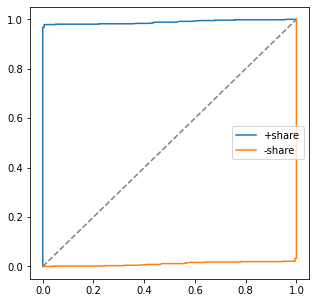

In [34]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.share)
plt.plot(fpr, tpr, label='+share')

fpr, tpr, _ = roc_curve(y_train, -df_train.share)
plt.plot(fpr, tpr, label='-share')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

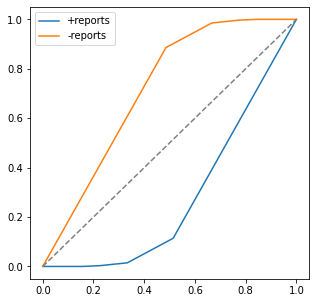

In [35]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.reports)
plt.plot(fpr, tpr, label='+reports')

fpr, tpr, _ = roc_curve(y_train, -df_train.reports)
plt.plot(fpr, tpr, label='-reports')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

## Training the model
From now on, use these columns only:

`["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]`

Apply one-hot-encoding using DictVectorizer and train the logistic regression with these parameters:

`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`



In [65]:
from sklearn.feature_extraction import DictVectorizer

columns = ["reports", "age", "income", "share", "expenditure", "dependents", "months", "majorcards", "active", "owner", "selfemp"]

def remove_cols(dataframe):
    return dataframe[columns]

df_train = remove_cols(df_train)
df_test = remove_cols(df_test)
df_val = remove_cols(df_val)

def ohe(dataframe):
    temp_df = pd.concat([dataframe, 
                         pd.get_dummies(dataframe['owner'], dtype=int, drop_first=True), 
                         pd.get_dummies(dataframe['selfemp'], dtype=int, drop_first=True)], 
                        axis=1).drop(['owner', 'selfemp'], axis=1)
    #temp_dict = temp_df.to_dict(orient='records')
    #temp_dv = DictVectorizer(sparse=False)
    #temp_dv.fit(temp_dict)
    #X_temp = temp_dv.transform(temp_dict)
    return temp_df #X_temp

X_train = ohe(df_train)
X_test = ohe(df_test)
X_val = ohe(df_val)

In [66]:
X_train.shape, X_test.shape, X_val.shape

((791, 11), (264, 11), (264, 11))

# Question 2:
What's the AUC of this model on the validation dataset?

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict_proba(X_val)[:, 1]

roc_auc_score(y_val, y_pred)

0.9950818206205848

# Question 3:
Now let's compute precision and recall for our model.

Evaluate the model on all thresholds from 0.0 to 1.0 with step 0.01
For each threshold, compute precision and recall. Plot them.

At which threshold precision and recall curves intersect?

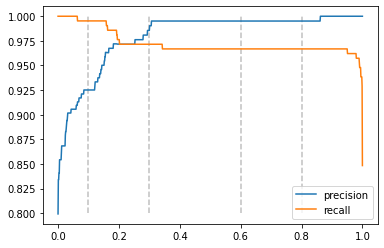

In [68]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []
    thresholds = np.linspace(0, 1, 1001)
    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)
        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)
        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()
        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()
        scores.append((t, tp, fp, fn, tn))
    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)
    return df_scores

df_scores = confusion_matrix_dataframe(y_val, y_pred)
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')
plt.vlines(0.1, 0.8, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.3, 0.8, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.6, 0.8, 1, color='grey', linestyle='--', alpha=0.5)
plt.vlines(0.8, 0.8, 1, color='grey', linestyle='--', alpha=0.5)
plt.legend()
plt.show()

In [71]:
df_scores.iloc[201:205,:]

,threshold,tp,fp,fn,tn,p,r
201,0.2010,206,6,5,47,0.9717,0.9763
202,0.2020,205,6,6,47,0.9716,0.9716
203,0.2030,205,6,6,47,0.9716,0.9716
204,0.2040,205,6,6,47,0.9716,0.9716


## Question 4:
Precision and recall are conflicting - when one grows, the other goes down. That's why they are often combined into the F1 score - a metrics that takes into account both

This is the formula for computing F1:

`F1 = 2 * P * R / (P + R)`

Where P is precision and R is recall.

Let's compute F1 for all thresholds from 0.0 to 1.0 with increment 0.01

At which threshold F1 is maximal?



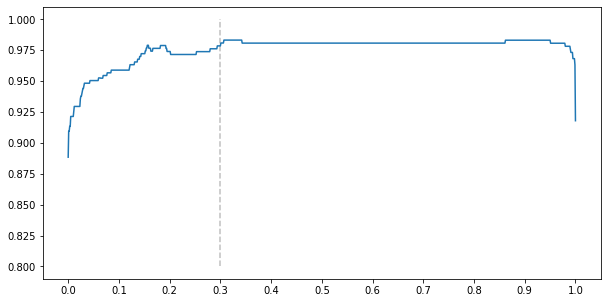

In [73]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.3, 0.8, 1, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [74]:
df_scores[df_scores['f1'] == df_scores['f1'].max()]

,threshold,tp,fp,fn,tn,p,r,f1
307,0.3070,205,1,6,52,0.9951,0.9716,0.9832
308,0.3080,205,1,6,52,0.9951,0.9716,0.9832
309,0.3090,205,1,6,52,0.9951,0.9716,0.9832
310,0.3100,205,1,6,52,0.9951,0.9716,0.9832
311,0.3110,205,1,6,52,0.9951,0.9716,0.9832
312,0.3120,205,1,6,52,0.9951,0.9716,0.9832
313,0.3130,205,1,6,52,0.9951,0.9716,0.9832
314,0.3140,205,1,6,52,0.9951,0.9716,0.9832
315,0.3150,205,1,6,52,0.9951,0.9716,0.9832
316,0.3160,205,1,6,52,0.9951,0.9716,0.9832


## Question 5:
Use the KFold class from Scikit-Learn to evaluate our model on 5 different folds:

`KFold(n_splits=5, shuffle=True, random_state=1)`

Iterate over different folds of df_full_train
Split the data into train and validation
Train the model on train with these parameters: 
`LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)`

Use AUC to evaluate the model on validation

In [79]:
from sklearn.model_selection import KFold

def train(df_train, y_train, C=1.0):
    dicts = df_train[columns].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)

    model = LogisticRegression(solver='liblinear', C=C)
    model.fit(X_train, y_train)

    return dv, model

def predict(df, dv, model):
    dicts = df[columns].to_dict(orient='records')

    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:, 1]

    return y_pred

scores = []

kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in kfold.split(df_train_full):
    df_train = df_train_full.iloc[train_idx]
    df_val = df_train_full.iloc[val_idx]

    y_train = df_train.card.values
    y_val = df_val.card.values

    dv, model = train(df_train, y_train, C=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.996 +- 0.003


## Question 6:
Now let's use 5-Fold cross-validation to find the best parameter C

Iterate over the following C values: `[0.01, 0.1, 1, 10]`
Initialize KFold with the same parameters as previously
Use these parametes for the model: 
`LogisticRegression(solver='liblinear', C=C, max_iter=1000)`

Compute the mean score as well as the std (round the mean and std to 3 decimal digits). Which C leads to the best mean score?

In [81]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

for C in [0.01, 0.1, 1, 10]:
    scores = []

    for train_idx, val_idx in kfold.split(df_train_full):
        df_train = df_train_full.iloc[train_idx]
        df_val = df_train_full.iloc[val_idx]

        y_train = df_train.card.values
        y_val = df_val.card.values

        dv, model = train(df_train, y_train, C=C)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (C, np.mean(scores), np.std(scores)))

C=0.01, 0.992 +- 0.006
C= 0.1, 0.995 +- 0.004
C=   1, 0.996 +- 0.003
C=  10, 0.996 +- 0.003
